# Osborne Data Analysis

Here at Osborne Data Analysis, we offer a wide range of data analysis services for any client.  

##Let's find some weather data!
Let's start with a small csv file containing weather data courtesy of NOAA's Climate Data Online (http://www.ncdc.noaa.gov/cdo-web/search)

The data was ordered using these search parameters:
1.  Custom Options: 	Station name, Geographic location
2.  Locations: 	ZIP:31088 - Warner Robins, GA 31088
3.  Data Types: 	SNOW - Snowfall (mm)
  1.  TMAX - Maximum temperature (tenths of degrees C)
  3.  TMIN - Minimum temperature (tenths of degrees C)
  5.  PRCP - Precipitation (tenths of mm)
  6.  TOBS - Temperature at the time of observation (tenths of degrees C)

For notebook formatting tips, try https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet.

###Read in the data
I saved the data file to my hard drive after ordering it from NOAA.  I gave the url variable a string containing the file path for the data and then I used the Pandas read_csv() function to read in the data from the csv file.  The argument "index_col='DATE'" treats the date column as the index for each row, the "parse_dates=True" argument parses the index column as a date, and "dayfirst=False" puts the month first in the date. The data is placed in a DataFrame object.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pint

url = "WarnerRobinsWeather 615991.csv"

df = pd.read_csv(url, index_col='DATE', parse_dates=True, dayfirst=False)

Now let's take a quick look at the dataset to make sure the data looks right. To do that, we use the head() function to show the first 2 rows of the dataset.  We see the station id and name, the elevation, latitude, longitude, precipitation, snowfall (which is -9999 because it did not snow), max temp, min temp, and temp at observation.  This appears as we expect, so we can move on.

In [52]:
df.head(2)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
DATE,,,,,,,,,,
2015-01-01,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0,-9999,144,6,100
2015-01-02,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,10,-9999,133,78,106


Now let's look at some statistics. The describe() function shows statistics for our dataset.  We see that all of the observatuins take place at the same location, and that no snow fell during this period.

In [53]:
df.describe()

,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
count,269,269.0000,269.0000,269.000000,269,269.000000,269.000000,269.000000
mean,128,32.6094,-83.6163,32.877323,-9999,254.776952,142.639405,177.223048
std,0,0.0000,0.0000,77.797454,0,83.246053,84.909215,79.671354
min,128,32.6094,-83.6163,0.000000,-9999,11.000000,-94.000000,-56.000000
25%,128,32.6094,-83.6163,0.000000,-9999,194.000000,83.000000,133.000000
50%,128,32.6094,-83.6163,0.000000,-9999,278.000000,172.000000,206.000000
75%,128,32.6094,-83.6163,20.000000,-9999,322.000000,217.000000,239.000000
max,128,32.6094,-83.6163,467.000000,-9999,378.000000,256.000000,283.000000


We can see immediately that we have problems with the data: Tmax and Tmin are in tenths of a degree Celsius.  We need to do some do some unit conversions.

In [54]:
# convert from tenths of degrees C to degrees C
df['TMAX']= df['TMAX'] * 0.10
df['TMIN']= df['TMIN'] * 0.10
df['TOBS']= df['TOBS'] * 0.10

#convert from tenths of mm to mm
df['PRCP'] = df['PRCP'] * 0.10

In [55]:
df.head(2)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
DATE,,,,,,,,,,
2015-01-01,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0,-9999,14.4,0.6,10.0
2015-01-02,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,1,-9999,13.3,7.8,10.6


In [56]:
#convert to farenheit
df['TMAX'] = df['TMAX'] * 9/5 + 32
df['TMIN'] = df['TMIN'] * 9/5 + 32
df['TOBS'] = df['TOBS'] * 9/5 + 32

#convert from mm to inches
df['PRCP'] = df['PRCP'] * 0.0393701

In [57]:
df.head(2)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
DATE,,,,,,,,,,
2015-01-01,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00000,-9999,57.92,33.08,50.00
2015-01-02,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.03937,-9999,55.94,46.04,51.08


Now let's look at some graphs.  This first graph is a plot of the daily maximum temperature from Jan 2015 to Oct 2015.  You can see from the plot some very obvious trends, such as the high temperatures for Jan-Mar range between the 30s and high 60s.  During July, August, and the first part of September the temperatures stayed between the 80s and 90s with some short trips into the triple digits.  Sounds like middle Georgia weather, right?

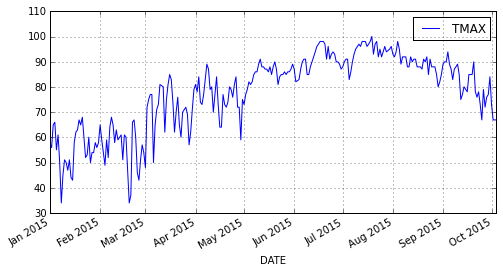

In [58]:
df[['TMAX']].plot(figsize=(8,4), style=['-']);

Now let's look at rainfall over the past calendar year to date.  From the plot, we can see there were 1.5 days so far in which the daily rainfall exceeded 4 inches.

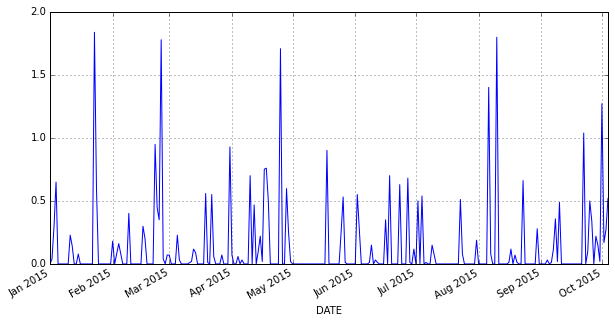

In [59]:
df['PRCP'].plot(figsize=(10,5), style=['-']);

So are we in a drought for the year?  To find the answer to that question, we need to find the total rainfall this year to date. Using pandas, that is a simple operation.

In [60]:
df['PRCP'].sum()

34.818916440000002

This can be crosschecked with data from other sources.  Using http://www.usclimatedata.com/climate/warner-robins/georgia/united-states/usga1271/2015/1 as a source, adding together the total monthly rainfall for each month gives a total year to date rainfall of 32.33 inches.  The numbers obtained from usclimatedata.com do not include rainfall for the first 4 days in October as the dataset shown here does, which accounts for the small discrepancy.

As a reference, here is the data used in this notebook.

In [38]:
df

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
DATE,,,,,,,,,,
2015-01-01,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00,-9999,136.256,91.544,122.000
2015-01-02,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.10,-9999,132.692,114.872,123.944
2015-01-03,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.76,-9999,148.892,123.944,148.892
2015-01-04,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,1.65,-9999,150.836,112.928,112.928
2015-01-05,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00,-9999,131.072,96.728,96.728
2015-01-06,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00,-9999,141.764,96.728,112.928
2015-01-07,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00,-9999,122.000,71.456,71.456
2015-01-08,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00,-9999,93.164,59.144,73.400
2015-01-09,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00,-9999,112.928,73.400,96.728
